# Pymaceuticals Inc.
---

### Observations and Insights
- *Your observations and insights here* ...


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df=pd.merge(study_results,mouse_metadata,
                          how = 'left', on='Mouse ID')
# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.


In [4]:
mice_count=len(combined_data_df["Mouse ID"].unique())
mice_count

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [6]:
duplicate_mice=combined_data_df.loc[combined_data_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [9]:
clean_df=combined_data_df[combined_data_df['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [82]:
# Checking the number of mice in the clean DataFrame.


In [113]:
mouse_count=len(clean_df['Mouse ID'].unique())
mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [114]:
drug_groups_df=clean_df#.loc[:,["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
drug_groups_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [115]:
tumor_mean=drug_groups_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_median=drug_groups_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_variance=drug_groups_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_std=drug_groups_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_sem=drug_groups_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]


In [116]:
drug_group_df=pd.DataFrame({"tumor_mean":tumor_mean,"tumor_median":tumor_median,"tumor_variance":tumor_variance,"tumor_std":tumor_std,"tumor_sem":tumor_sem})
drug_group_df


,tumor_mean,tumor_median,tumor_variance,tumor_std,tumor_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [110]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.


In [117]:
regimen_counts=clean_df["Drug Regimen"].value_counts()
regimen_counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Number of Mice Tested')

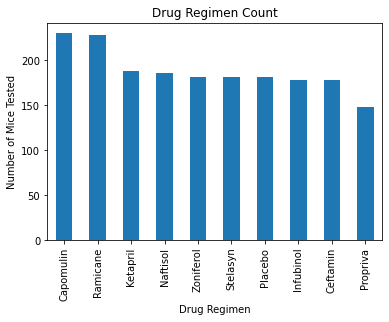

In [118]:
regimen_chart=regimen_counts.plot(kind="bar",title="Drug Regimen Count")
regimen_chart.set_xlabel("Drug Regimen")
regimen_chart.set_ylabel("Number of Mice Tested")

In [111]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.


In [139]:
regimen_count=clean_df.groupby("Drug Regimen")
regimen_counts_df=pd.DataFrame(regimen_count["Drug Regimen"].count())


<function matplotlib.pyplot.show(close=None, block=None)>

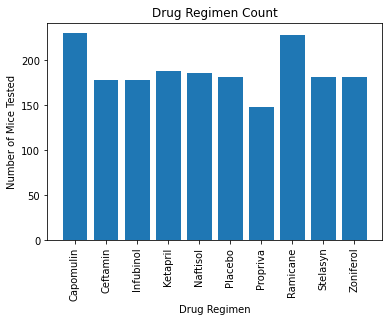

In [144]:
x_axis=np.arange(len(regimen_counts_df))
tick_locs=[value for value in x_axis]
plt.bar(x_axis,regimen_counts_df["Drug Regimen"])
plt.xticks(tick_locs,list(regimen_counts_df.index),rotation="vertical")
plt.title("Drug Regimen Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show

In [112]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


In [37]:
pie_data=clean_df["Sex"].value_counts()


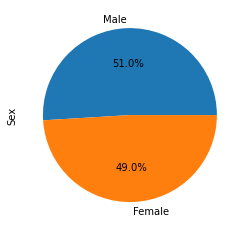

In [43]:
pandas_pie=pie_data.plot.pie(autopct="%1.1f%%")


In [113]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


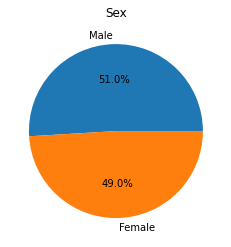

In [48]:
plt.pie(pie_data,labels=pie_data.index.values,autopct="%1.1f%%")
plt.title("Sex")
plt.show()

## Line and Scatter Plots

In [114]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [63]:
mouse=clean_df.loc[clean_df["Mouse ID"]=='l509']

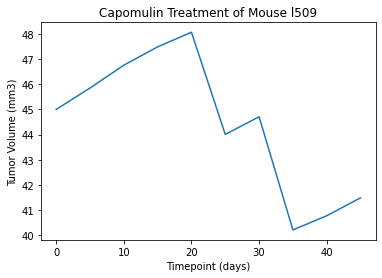

In [65]:
plt.plot(mouse["Timepoint"],mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

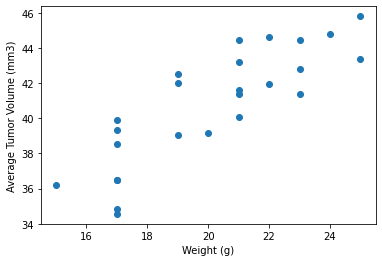

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


In [93]:
capomulin_data=clean_df.loc[clean_df['Drug Regimen']=='Capomulin']

In [94]:
avg_tum_vol=pd.DataFrame(capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index()
avg_tum_vol=avg_tum_vol.rename(columns={"Tumor Volume (mm3)":"Avg_Tum_Vol"})
avg_tum_vol.head()

,Mouse ID,Avg_Tum_Vol
0,s185,34.559143
1,m601,34.847470
2,x401,36.182040
3,f966,36.505973
4,r554,36.509212


In [97]:
avg_tum_vol_df=pd.merge(capomulin_data,avg_tum_vol,on="Mouse ID")
avg_tum_vol_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Avg_Tum_Vol
0,b128,0,45.000000,0,Capomulin,Female,9,22,41.963636
1,b128,5,45.651331,0,Capomulin,Female,9,22,41.963636
2,b128,10,43.270852,0,Capomulin,Female,9,22,41.963636
3,b128,15,43.784893,0,Capomulin,Female,9,22,41.963636
4,b128,20,42.731552,0,Capomulin,Female,9,22,41.963636


In [108]:
avg_tum_vol_df=avg_tum_vol_df[["Weight (g)","Avg_Tum_Vol"]].drop_duplicates()
avg_tum_vol_df.head()

,Weight (g),Avg_Tum_Vol
0,22,41.963636
10,21,43.216925
18,17,36.509212
28,17,34.559143
38,21,40.083699


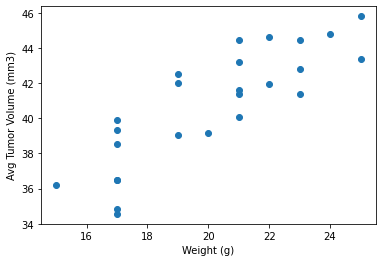

In [109]:
x=avg_tum_vol_df["Weight (g)"]
y=avg_tum_vol_df["Avg_Tum_Vol"]

plt.scatter(x,y)
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()